# Multiple Linear Regression
## Bike Case Study

#### Problem Statement:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike_rentals dataset

In [152]:
# Supress Warnings and import libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [153]:
bike_rentals = pd.read_csv("day.csv")
# Check the head of the dataset
bike_rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike_rentals dataframe

In [154]:
bike_rentals.shape

(730, 16)

In [155]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [156]:
bike_rentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [157]:
# drop irrelevent fields
bike_rentals=bike_rentals.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting the season, weathersit, mnth, weekday columns from numerical values to categorical columns

In [158]:

bike_rentals.season=bike_rentals.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_rentals.weathersit=bike_rentals.weathersit.map({1:'Clear', 2:'Mist', 3:'Snow', 4:'Rainy'})
bike_rentals.mnth=bike_rentals.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_rentals.weekday=bike_rentals.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Finalize Numerical and Categorical variables

In [159]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

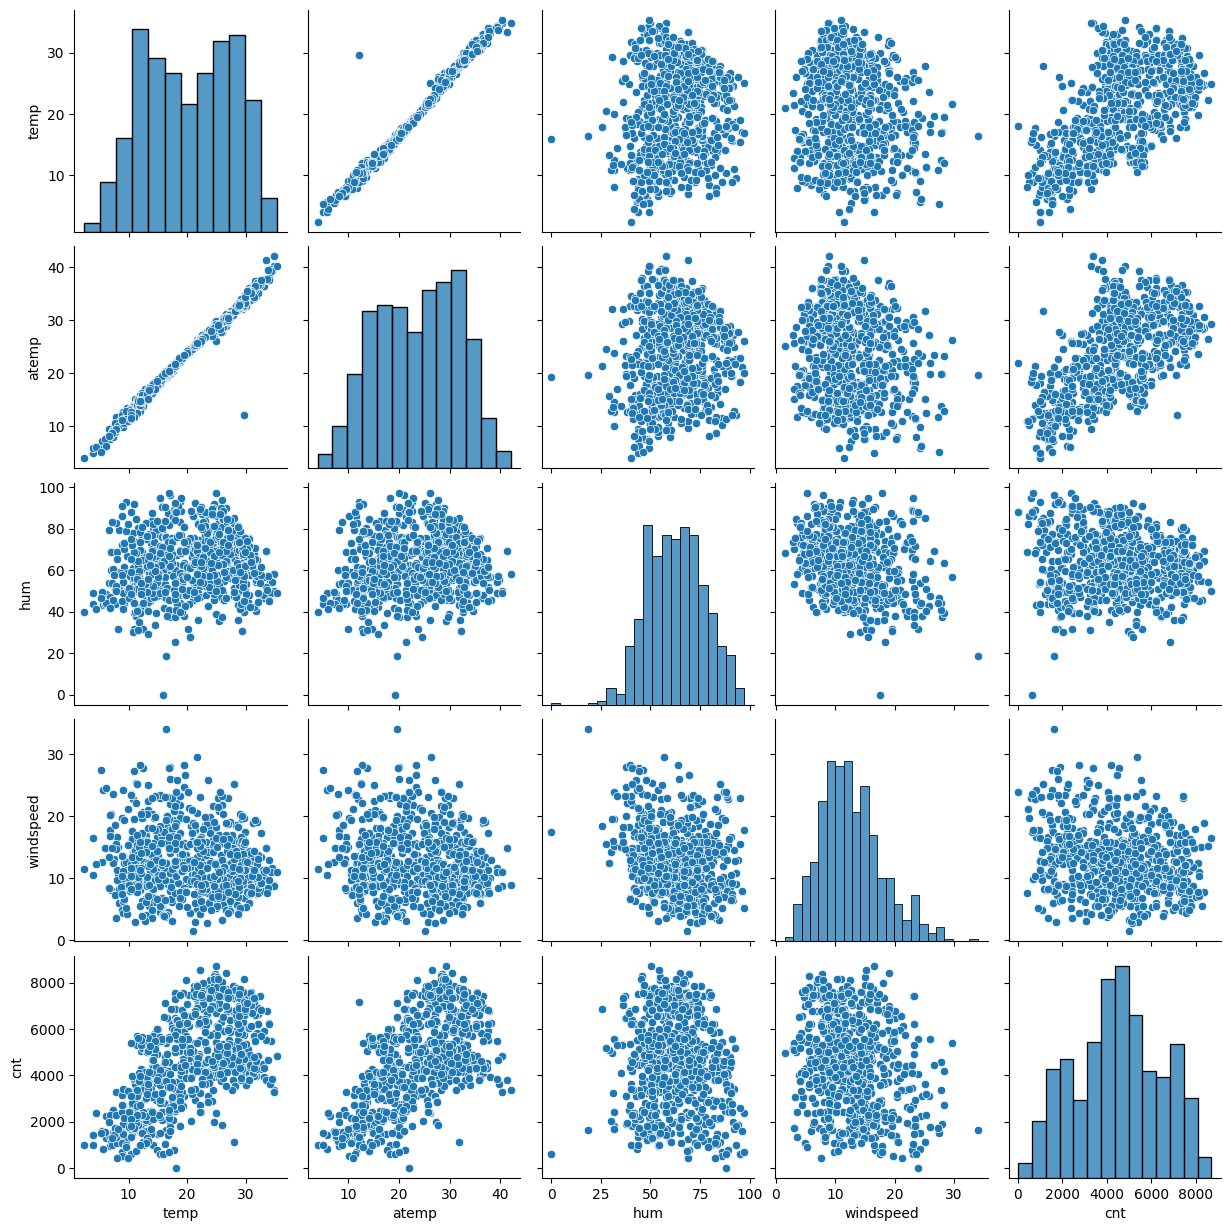

In [160]:
sns.pairplot(bike_rentals[num_cols])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

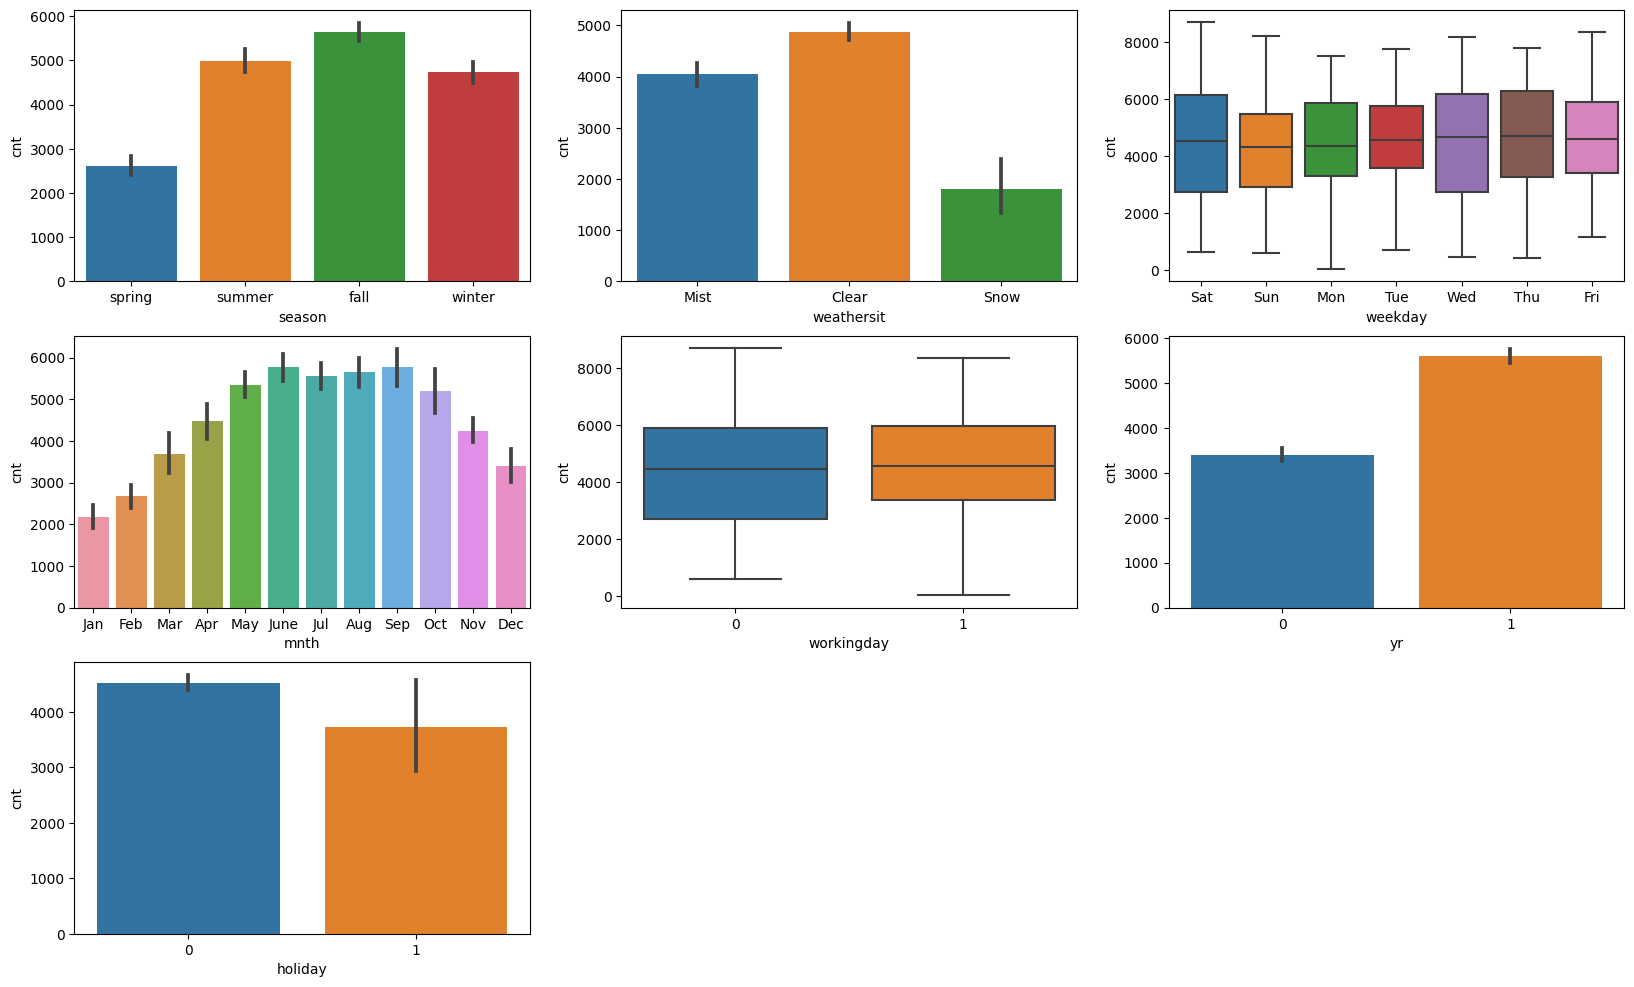

In [161]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_rentals)
plt.subplot(3,3,2)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_rentals)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rentals)
plt.subplot(3,3,4)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_rentals)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rentals)
plt.subplot(3,3,6)
sns.barplot(x = 'yr', y = 'cnt', data = bike_rentals)
plt.subplot(3,3,7)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_rentals)
plt.show()

## Step 3: Data Preparation

- You can see that our dataset has many columns with categorical values like season, mnth, weathersit etc.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s,basically we nedd to encode all categorical variables.

In [162]:
# Check the bike_rentals dataframe now
bike_rentals_df = bike_rentals
bike_rentals_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Fri,1,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Sat,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


### Encoding categorical variables to dummy variable

In [163]:
varlist = ['season', 'weathersit', 'mnth', 'weekday'] # omitting yr, holiday, workingday as it is already encoded with 0 and 1
bike_data = pd.get_dummies(bike_rentals_df[varlist], drop_first=True)
bike_data.head()

,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_Snow,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [164]:
# # concat actual dataframe with dummy variables dataframe
merged_df = pd.concat([bike_rentals_df, bike_data], axis=1)
merged_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [165]:
#drop original categorical variables
final_data= merged_df.drop(varlist, axis=1)
final_bike_rental_data = final_data
final_bike_rental_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [166]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_rentals_train, bike_rentals_test = train_test_split(final_bike_rental_data, train_size = 0.7, test_size = 0.3, random_state = 100)
bike_rentals_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Mist', 'weathersit_Snow', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Rescaling the Features 

Here we can see that except for `cnt`, all the columns have relatively smaller integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation

This time, we will use MinMax scaling.

In [167]:
scaler = MinMaxScaler()

In [168]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
bike_rentals_train[num_cols] = scaler.fit_transform(bike_rentals_train[num_cols])

In [169]:
bike_rentals_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0.764151,0,1,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,...,0,0,0,0,0,0,0,0,0,1
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,0,0,0,0,1,0,0,0,0


In [170]:
bike_rentals_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


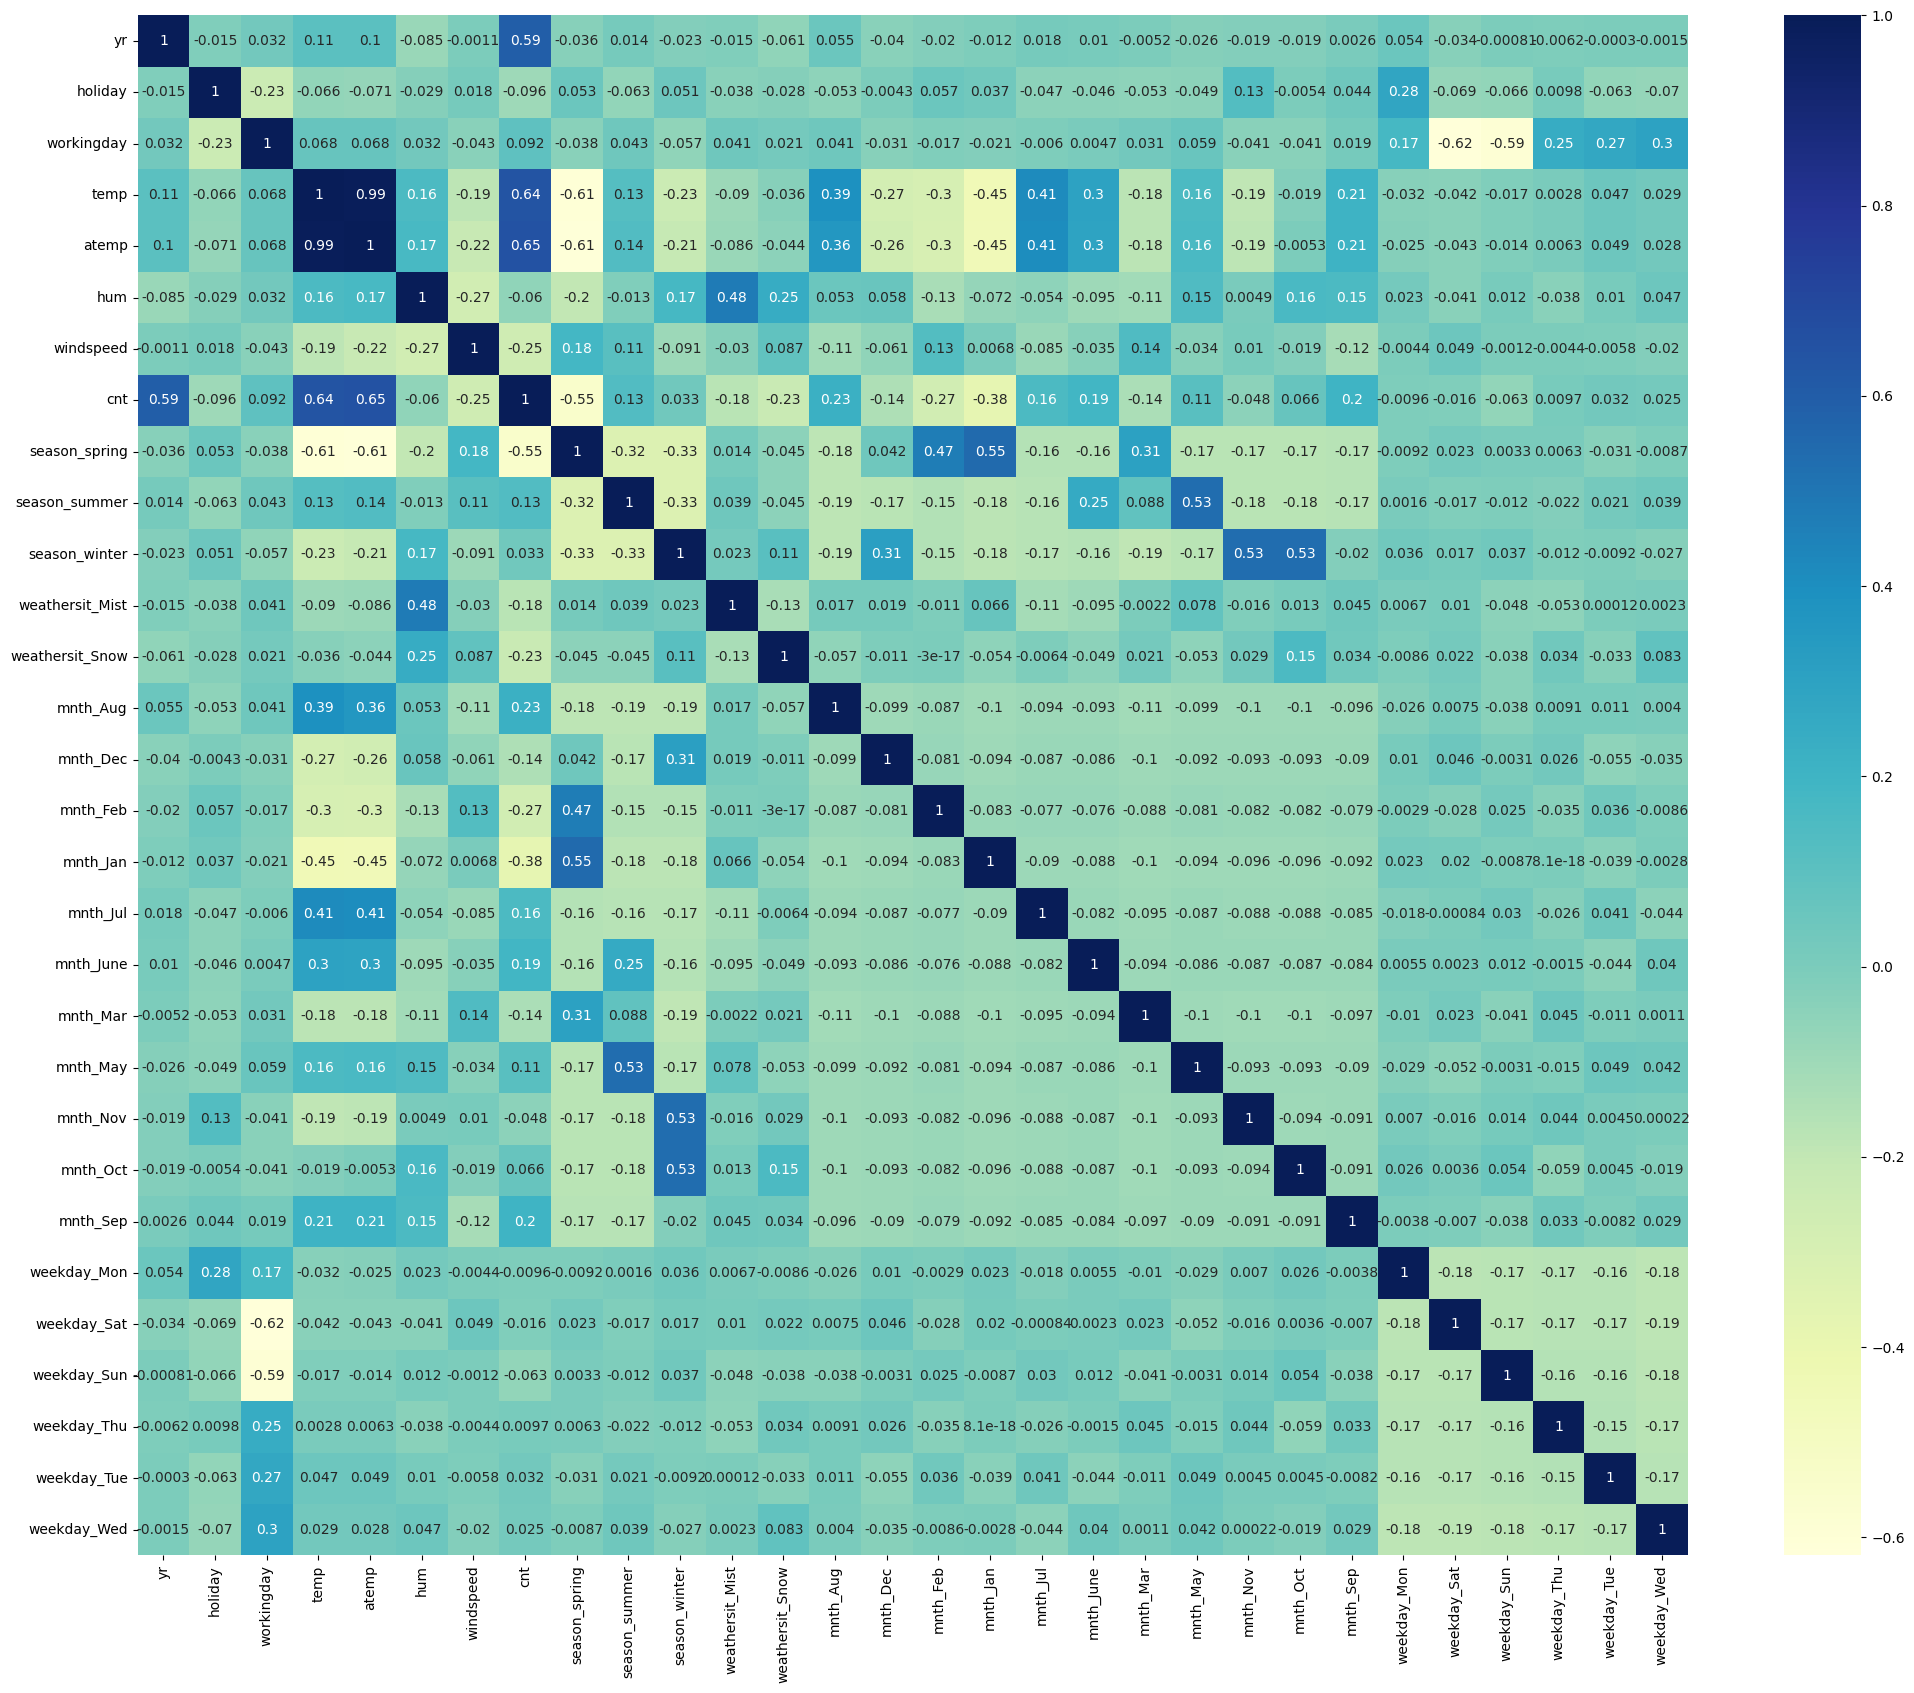

In [171]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(bike_rentals_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We see high correlation between temp and atemp, hence dropping atemp.


In [172]:
bike_rentals_train.drop(['atemp'], axis=1, inplace=True)
bike_rentals_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


So, we pick `cnt` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [173]:
y_train = bike_rentals_train.pop('cnt')
X_train = bike_rentals_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Automatic feature seelction using RFE method


In [174]:
#Since the total number of variables are 30, manual elimination of variables will be time consuming process
#Using RFE to calculate the best 15 variables to be used for model building

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_Snow', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_June', False, 13),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 14)]

In [175]:
rfe_columns=X_train.columns[rfe.support_]
X_train=X_train[rfe_columns]

In [176]:
# Since we need to repeatedly build Model and calculate VIF adding two functions for the same

def build_model(X_train, y_train):
    # Add a constant
    X_train_lm = sm.add_constant(X_train)
    # Create a fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    return X_train_lm, lr

def calculate_VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    

In [177]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'weathersit_Mist', 'weathersit_Snow',
       'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun'],
      dtype='object')

### Build Model #1

In [178]:
X_train_new,lm1 = build_model(X_train, y_train)
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.03e-190
Time:                        13:48:25   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2503      0.025      9.865      0.000       0.200       0.300
yr                  0.2316      0.008     28.670      0.000       0.216       0.247
holiday            -0.0060      0.021     -0.284      0.776      -0.048       0.036
workingday          0.0965      0.009     10.419      0.000       0.078       0.115
temp                0.4610      0.031     14.686      0.000       0.399       0.523
hum                -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed          -0.1757      0.026     -6.878      0.000      -0.226      -0.126
season_spring      -0.0979      0.015     -6.420      0.000      -0.128      -0.068
season_winter       0.0538      0.012      4.353      0.000       0.030       0.078
weathersit_Mist    -0.0593      0.010     -5.660      0.000      -0.080      -0.039
weathersit_Snow    -0.2538      0.026     -9.670      0.000      -0.305      -0.202
mnth_Jan           -0.0402      0.017     -2.304      0.022      -0.074      -0.006
mnth_Jul           -0.0744      0.017     -4.357      0.000      -0.108      -0.041
mnth_Sep            0.0602      0.015      3.919      0.000       0.030       0.090
weekday_Sat         0.1066      0.011      9.369      0.000       0.084       0.129
weekday_Sun         0.0533      0.012      4.462      0.000       0.030       0.077
==============================================================================
Omnibus:                       63.289   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.287
Skew:                          -0.629   Prob(JB):                     5.75e-36
Kurtosis:                       5.460   Cond. No.                     7.10e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Build Model #2 by dropping 'holiday' as its p value is >0.05

In [179]:
X_train_new = X_train_new.drop('holiday', 1)
#build 2nd model
X_train_new, lm2 = build_model(X_train_new, y_train)
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.03e-190
Time:                        13:48:25   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2443      0.040      6.120      0.000       0.166       0.323
yr                  0.2316      0.008     28.670      0.000       0.216       0.247
workingday          0.1025      0.026      4.014      0.000       0.052       0.153
temp                0.4610      0.031     14.686      0.000       0.399       0.523
hum                -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed          -0.1757      0.026     -6.878      0.000      -0.226      -0.126
season_spring      -0.0979      0.015     -6.420      0.000      -0.128      -0.068
season_winter       0.0538      0.012      4.353      0.000       0.030       0.078
weathersit_Mist    -0.0593      0.010     -5.660      0.000      -0.080      -0.039
weathersit_Snow    -0.2538      0.026     -9.670      0.000      -0.305      -0.202
mnth_Jan           -0.0402      0.017     -2.304      0.022      -0.074      -0.006
mnth_Jul           -0.0744      0.017     -4.357      0.000      -0.108      -0.041
mnth_Sep            0.0602      0.015      3.919      0.000       0.030       0.090
weekday_Sat         0.1126      0.027      4.171      0.000       0.060       0.166
weekday_Sun         0.0593      0.027      2.186      0.029       0.006       0.113
==============================================================================
Omnibus:                       63.289   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.287
Skew:                          -0.629   Prob(JB):                     5.75e-36
Kurtosis:                       5.460   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
#Since all P values of model lm2 is in acceptable range, lets calculate VIF values for further eliminating the features
vif = calculate_VIF(X_train_new)
vif

,Features,VIF
0,const,101.18
2,workingday,9.07
13,weekday_Sat,6.06
14,weekday_Sun,5.74
3,temp,3.19
6,season_spring,2.72
4,hum,1.90
7,season_winter,1.81
8,weathersit_Mist,1.57
10,mnth_Jan,1.55


### Build Model #3 by dropping 'workingday' as we have highest VIF for the same

In [181]:
# Remove workingday 
X_train_new = X_train_new.drop('workingday', 1)
#build 3rd model
X_train_new, lm3 = build_model(X_train_new, y_train)
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          7.45e-188
Time:                        13:48:26   Log-Likelihood:                 506.00
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     496   BIC:                            -924.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3446      0.032     10.912      0.000       0.283       0.407
yr                  0.2321      0.008     28.307      0.000       0.216       0.248
temp                0.4618      0.032     14.492      0.000       0.399       0.524
hum                -0.1428      0.038     -3.749      0.000      -0.218      -0.068
windspeed          -0.1781      0.026     -6.872      0.000      -0.229      -0.127
season_spring      -0.1007      0.015     -6.507      0.000      -0.131      -0.070
season_winter       0.0506      0.013      4.039      0.000       0.026       0.075
weathersit_Mist    -0.0572      0.011     -5.389      0.000      -0.078      -0.036
weathersit_Snow    -0.2489      0.027     -9.354      0.000      -0.301      -0.197
mnth_Jan           -0.0410      0.018     -2.320      0.021      -0.076      -0.006
mnth_Jul           -0.0737      0.017     -4.254      0.000      -0.108      -0.040
mnth_Sep            0.0565      0.016      3.628      0.000       0.026       0.087
weekday_Sat         0.0140      0.011      1.232      0.219      -0.008       0.036
weekday_Sun        -0.0392      0.012     -3.333      0.001      -0.062      -0.016
==============================================================================
Omnibus:                       79.506   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.427
Skew:                          -0.756   Prob(JB):                     5.02e-49
Kurtosis:                       5.860   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
vif = calculate_VIF(X_train_new)
vif

,Features,VIF
0,const,61.47
2,temp,3.19
5,season_spring,2.71
3,hum,1.90
6,season_winter,1.81
7,weathersit_Mist,1.57
9,mnth_Jan,1.55
10,mnth_Jul,1.31
8,weathersit_Snow,1.25
4,windspeed,1.19


### Build Model #4 by dropping 'weekday_Sat' as its p-value greater than 0.05

In [183]:
# Drop weekday_Sat 
X_train_new = X_train_new.drop('weekday_Sat', 1)
#build 4th model
X_train_new,lm4 = build_model(X_train_new, y_train)
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.05e-188
Time:                        13:48:26   Log-Likelihood:                 505.22
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     497   BIC:                            -929.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3481      0.031     11.061      0.000       0.286       0.410
yr                  0.2317      0.008     28.267      0.000       0.216       0.248
temp                0.4614      0.032     14.472      0.000       0.399       0.524
hum                -0.1446      0.038     -3.798      0.000      -0.219      -0.070
windspeed          -0.1771      0.026     -6.832      0.000      -0.228      -0.126
season_spring      -0.1006      0.015     -6.501      0.000      -0.131      -0.070
season_winter       0.0510      0.013      4.070      0.000       0.026       0.076
weathersit_Mist    -0.0569      0.011     -5.358      0.000      -0.078      -0.036
weathersit_Snow    -0.2483      0.027     -9.326      0.000      -0.301      -0.196
mnth_Jan           -0.0408      0.018     -2.308      0.021      -0.076      -0.006
mnth_Jul           -0.0733      0.017     -4.226      0.000      -0.107      -0.039
mnth_Sep            0.0566      0.016      3.632      0.000       0.026       0.087
weekday_Sun        -0.0417      0.012     -3.599      0.000      -0.064      -0.019
==============================================================================
Omnibus:                       74.809   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.000
Skew:                          -0.697   Prob(JB):                     2.78e-48
Kurtosis:                       5.892   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
vif = calculate_VIF(X_train_new)
vif

,Features,VIF
0,const,60.98
2,temp,3.18
5,season_spring,2.71
3,hum,1.89
6,season_winter,1.81
7,weathersit_Mist,1.56
9,mnth_Jan,1.55
10,mnth_Jul,1.31
8,weathersit_Snow,1.25
4,windspeed,1.19


### Build Model #5 by dropping 'mnth_Jan' as its p-value 0.02 nearer to 0.05

In [185]:
# Drop weekday_Sat 
X_train_new = X_train_new.drop('mnth_Jan', 1)
#build 5th model
X_train_new,lm5 = build_model(X_train_new, y_train)
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          9.40e-189
Time:                        13:48:26   Log-Likelihood:                 502.50
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     498   BIC:                            -930.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3374      0.031     10.792      0.000       0.276       0.399
yr                  0.2309      0.008     28.071      0.000       0.215       0.247
temp                0.4795      0.031     15.453      0.000       0.419       0.540
hum                -0.1493      0.038     -3.912      0.000      -0.224      -0.074
windspeed          -0.1699      0.026     -6.575      0.000      -0.221      -0.119
season_spring      -0.1096      0.015     -7.282      0.000      -0.139      -0.080
season_winter       0.0551      0.012      4.426      0.000       0.031       0.080
weathersit_Mist    -0.0570      0.011     -5.347      0.000      -0.078      -0.036
weathersit_Snow    -0.2457      0.027     -9.197      0.000      -0.298      -0.193
mnth_Jul           -0.0768      0.017     -4.429      0.000      -0.111      -0.043
mnth_Sep            0.0558      0.016      3.565      0.000       0.025       0.087
weekday_Sun        -0.0413      0.012     -3.545      0.000      -0.064      -0.018
==============================================================================
Omnibus:                       72.180   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.120
Skew:                          -0.670   Prob(JB):                     8.69e-47
Kurtosis:                       5.861   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
vif = calculate_VIF(X_train_new)
vif

,Features,VIF
0,const,59.65
2,temp,2.99
5,season_spring,2.54
3,hum,1.89
6,season_winter,1.77
7,weathersit_Mist,1.56
9,mnth_Jul,1.30
8,weathersit_Snow,1.24
4,windspeed,1.17
10,mnth_Sep,1.10


#### As we can see both lm4 and lm5 have P value and VIF are in accepted range. Also the R2 value is decent enough for regression model.
#### However by dropping mnth_Jan, though R2 went slightly down from .840 to .838, F-Score got significant rise from 216.8 to 234. Hence considering lm5 as final model.

In [187]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          9.40e-189
Time:                        13:48:26   Log-Likelihood:                 502.50
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     498   BIC:                            -930.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3374      0.031     10.792      0.000       0.276       0.399
yr                  0.2309      0.008     28.071      0.000       0.215       0.247
temp                0.4795      0.031     15.453      0.000       0.419       0.540
hum                -0.1493      0.038     -3.912      0.000      -0.224      -0.074
windspeed          -0.1699      0.026     -6.575      0.000      -0.221      -0.119
season_spring      -0.1096      0.015     -7.282      0.000      -0.139      -0.080
season_winter       0.0551      0.012      4.426      0.000       0.031       0.080
weathersit_Mist    -0.0570      0.011     -5.347      0.000      -0.078      -0.036
weathersit_Snow    -0.2457      0.027     -9.197      0.000      -0.298      -0.193
mnth_Jul           -0.0768      0.017     -4.429      0.000      -0.111      -0.043
mnth_Sep            0.0558      0.016      3.565      0.000       0.025       0.087
weekday_Sun        -0.0413      0.012     -3.545      0.000      -0.064      -0.018
==============================================================================
Omnibus:                       72.180   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.120
Skew:                          -0.670   Prob(JB):                     8.69e-47
Kurtosis:                       5.861   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
lm5.params

const              0.337391
yr                 0.230896
temp               0.479506
hum               -0.149350
windspeed         -0.169948
season_spring     -0.109563
season_winter      0.055102
weathersit_Mist   -0.057026
weathersit_Snow   -0.245663
mnth_Jul          -0.076807
mnth_Sep           0.055785
weekday_Sun       -0.041251
dtype: float64

In [189]:
X_train_new.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_Mist', 'weathersit_Snow', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sun'],
      dtype='object')

### Let's visualise the on variable 'temp' data with a scatter plot and the fitted regression line

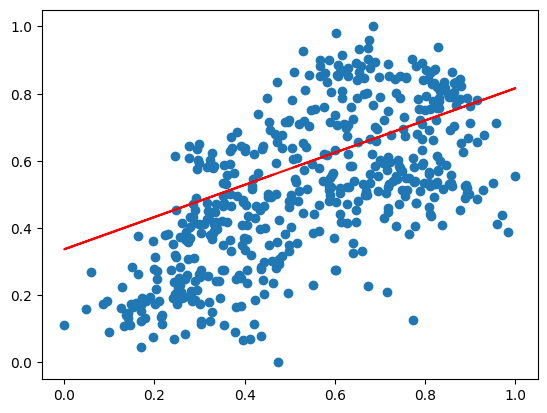

In [201]:
plt.scatter(X_train_new['temp'], y_train)
plt.plot(X_train_new['temp'], 0.337 + 0.479*X_train_new['temp'], 'r')
plt.show()

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [191]:
y_train_cnt = lm5.predict(X_train_new)

Text(0.5, 0, 'Errors')

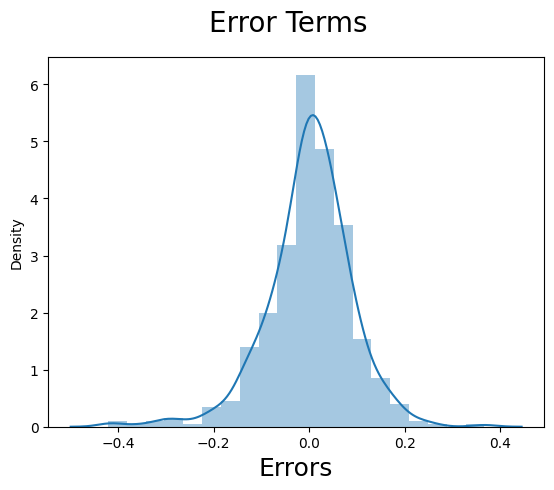

In [192]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [193]:
bike_rentals_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,0,0,1,0,0


In [194]:
vars = ['temp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()
bike_rentals_test[vars] = scaler.fit_transform(bike_rentals_test[vars])

In [195]:
bike_rentals_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,24.255828,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.249189,8.299641,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,17.085500,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,24.873150,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,31.155725,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [196]:
y_test = bike_rentals_test.pop('cnt')
X_test = bike_rentals_test

In [197]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop(['const'], axis=1)

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [198]:
# Making predictions using the fifth model

y_pred_m5 = lm5.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

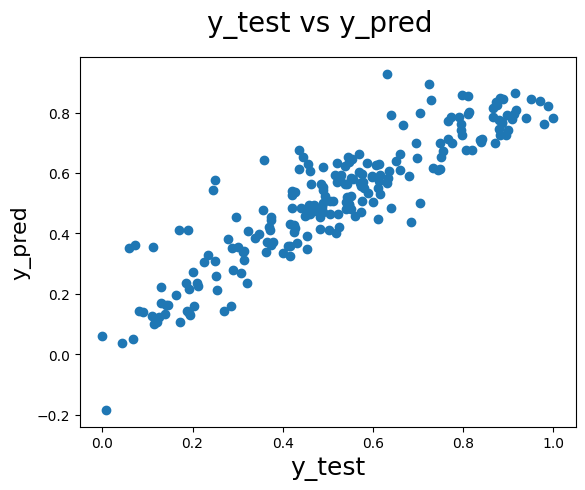

In [199]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.230  \times  yr + 0.479  \times  temp - 0.149 \times hum - 0.170 \times windspeed - 0.109 \times season_spring + 0.055 \times season_winter - 0.057 \times weathersit_Mist - 0.245 \times weathersit_Snow - 0.076 \times mnth_Jul + 0.056 \times mnth_Sep - 0.041 \times weekday_Sun  $


## Calculate R2 Score on test data

In [200]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.8156464908029246